# **Binary Image Classification**

Image Classification of Men and Women dataset.


*dataset link:- https://www.kaggle.com/datasets/saadpd/menwomen-classification*

# **Importing Libraries**

In [1]:
import os
import imghdr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow  import keras
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from keras import Sequential
from tensorflow.keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Rescaling, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm

2024-07-18 05:55:42.050481: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 05:55:42.050542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 05:55:42.052066: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


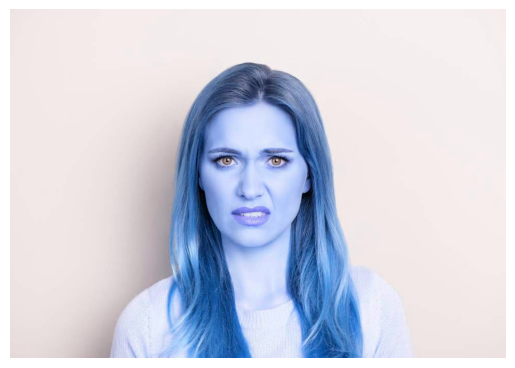

In [2]:
temp = cv2.imread('/kaggle/input/menwomen-classification/testdata/testdata/women/00000000.jpg')
plt.axis("off")
plt.imshow(temp)

# Importing the dataset

In [3]:
train_dir = '/kaggle/input/menwomen-classification/traindata/traindata'
test_dir = '/kaggle/input/menwomen-classification/testdata/testdata'

In [4]:
train_men_img = os.listdir(os.path.join(train_dir, 'men'))
train_women_img = os.listdir(os.path.join(train_dir, 'women'))

test_men_img = os.listdir(os.path.join(test_dir, 'men'))
test_women_img = os.listdir(os.path.join(test_dir, 'women'))

In [5]:
# Count the number of files in each directory
train_num_men_images = len(train_men_img)
train_num_women_images = len(train_women_img)

# Calculate the total number of images
train_total_images = train_num_men_images + train_num_women_images

print("Total number of images in the train men folder", train_num_men_images)
print("Total number of images in the train women folder", train_num_women_images)
print("Total number of images in the train dataset:", train_total_images)

# Count the number of files in each directory
test_num_men_images = len(test_men_img)
test_num_women_images = len(test_women_img)

print("\n")
# Calculate the total number of images
test_total_images = test_num_men_images + test_num_women_images

print("Total number of images in the test men folder", test_num_men_images)
print("Total number of images in the test women folder", test_num_women_images)
print("Total number of images in the test dataset:", test_total_images)

Total number of images in the train men folder 1000
Total number of images in the train women folder 1912
Total number of images in the train dataset: 2912


Total number of images in the test men folder 418
Total number of images in the test women folder 915
Total number of images in the test dataset: 1333


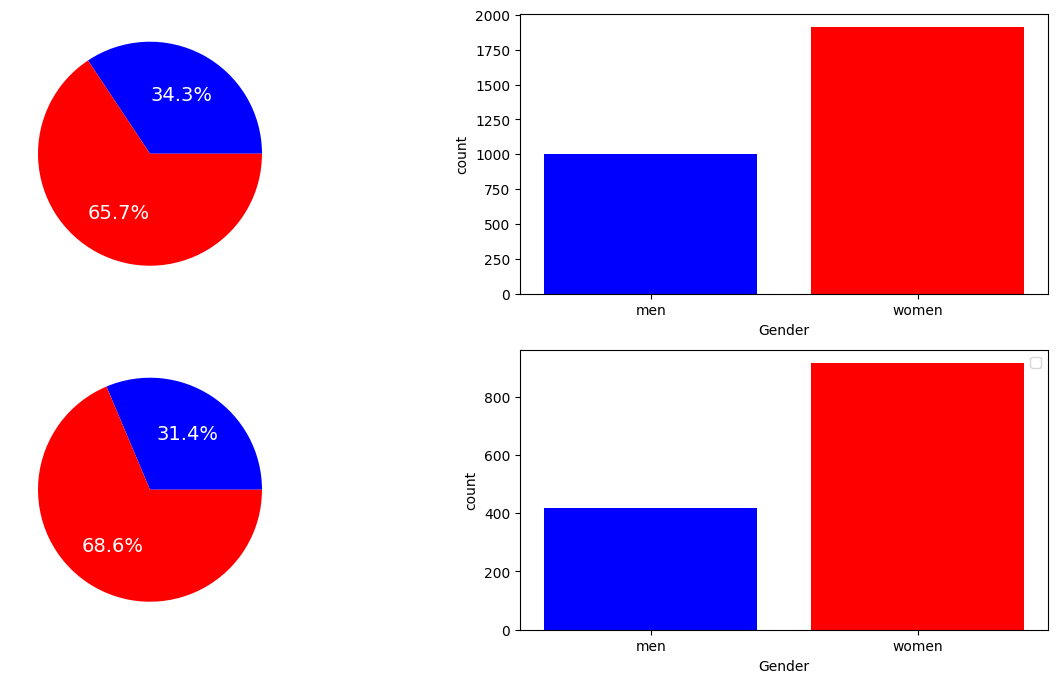

In [6]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.pie([train_num_men_images, train_num_women_images], labels=['men', 'women'], colors = ['blue', 'red'], autopct='%1.1f%%', textprops={'fontsize': 14, 'color': 'white'})
plt.subplot(2, 2, 2)
plt.bar(['men', 'women'], [train_num_men_images, train_num_women_images], color = ['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('count')

plt.subplot(2, 2, 3)
plt.pie([test_num_men_images, test_num_women_images], labels=['men', 'women'], colors = ['blue', 'red'], autopct='%1.1f%%', textprops={'fontsize': 14, 'color': 'white'})
plt.subplot(2, 2, 4)
plt.bar(['men', 'women'], [test_num_men_images, test_num_women_images], color = ['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('count')

plt.legend()
plt.show()

In [7]:
X_train = []
Y_train = []
c = 0
for img1_path, img2_path in tqdm(zip(train_men_img, train_women_img)):
    
    try:
        img_full_path = os.path.join(train_dir, 'men', img1_path)
        img_type1 = imghdr.what(img_full_path)
        if os.path.exists(img_full_path) and img_type1 in ['jpg', 'jpeg', 'png']:  # Check if the image is a valid format
            img1 = cv2.imread(img_full_path)
            img1 = cv2.resize(img1, (256, 256))
            X_train.append(img1)
            Y_train.append(0)
        else:
            print(f"Warning: Unable to read image {img_full_path}")
    except Exception as e:
        c +=1
    
    try:
        img_full_path = os.path.join(train_dir, 'women', img2_path)
        img_type2 = imghdr.what(img_full_path)
        if os.path.exists(img_full_path) and img_type2 in ['jpg','jpeg', 'png']:  # Check if the image is a valid format
            img2 = cv2.imread(img_full_path)
            img2 = cv2.resize(img2, (256, 256))
            X_train.append(img2)
            Y_train.append(1)
        else:
            print(f"Warning: Unable to read image {img_full_path}")
    except Exception as e:
        c +=1
    
X_train = np.array(X_train, dtype=np.float32)/255.0
Y_train = np.array(Y_train)

0it [00:00, ?it/s]Corrupt JPEG data: 6 extraneous bytes before marker 0xed
6it [00:00, 48.21it/s]

38it [00:00, 82.42it/s]

47it [00:00, 53.76it/s]

62it [00:00, 60.89it/s]

83it [00:01, 60.77it/s]

122it [00:02, 57.93it/s]

158it [00:02, 73.60it/s]

173it [00:02, 62.27it/s]

182it [00:02, 68.04it/s]libpng warning: iCCP: known incorrect sRGB profile
199it [00:03, 56.09it/s]

libpng warning: iCCP: known incorrect sRGB profile
213it [00:03, 49.75it/s]

254it [00:04, 41.07it/s]

264it [00:05, 52.69it/s]Corrupt JPEG data: 6 extraneous bytes before marker 0xed
290it [00:05, 68.44it/s]

318it [00:06, 33.89it/s]libpng warning: iCCP: known incorrect sRGB profile
330it [00:06, 41.83it/s]

338it [00:06, 47.48it/s]

366it [00:07, 44.15it/s]

390it [00:07, 57.94it/s]

398it [00:07, 61.92it/s]

414it [00:08, 46.07it/s]

426it [00:08, 35.87it/s]

437it [00:08, 40.72it/s]

442it [00:09, 32.43it/s]libpng warning: iCCP: known incorrect sRGB profile
477it [00:09, 63.68it/s]

507it [00:10, 66.24it/s]

514it [00:10, 52.83it/s]

522it [00:10, 52.81it/s]

559it [00:11, 56.16it/s]

libpng warning: iCCP: known incorrect sRGB profile
584it [00:11, 68.54it/s]

614it [00:11, 64.09it/s]

632it [00:12, 66.18it/s]

648it [00:12, 51.08it/s]

655it [00:12, 49.83it/s]Corrupt JPEG data: 5 extraneous bytes before marker 0xee
663it [00:12, 53.92it/s]

709it [00:13, 59.20it/s]

732it [00:13, 62.90it/s]

750it [00:14, 35.57it/s]

764it [00:14, 48.85it/s]

775it [00:15, 28.00it/s]

823it [00:16, 51.39it/s]

851it [00:16, 71.10it/s]

865it [00:18, 19.90it/s]

889it [00:18, 37.61it/s]

903it [00:18, 45.32it/s]

918it [00:19, 52.68it/s]

943it [00:19, 65.10it/s]

959it [00:19, 59.70it/s]

985it [00:20, 64.95it/s]

1000it [00:20, 48.86it/s]


In [8]:
X_train.shape

(1900, 256, 256, 3)

In [9]:
X_test = []
Y_test = []
c = 0
for img1_path, img2_path in tqdm(zip(test_men_img, test_women_img)):
    
    try:
        img_full_path = os.path.join(test_dir, 'men', img1_path)
        img_type1 = imghdr.what(img_full_path)
        if os.path.exists(img_full_path) and img_type1 in ['jpg', 'jpeg', 'png']:  # Check if the image is a valid format
            img1 = cv2.imread(img_full_path)
            img1 = cv2.resize(img1, (256, 256))
            X_test.append(img1)
            Y_test.append(0)
        else:
            print(f"Warning: Unable to read image {img_full_path}")
    except Exception as e:
        c +=1
    
    try:
        img_full_path = os.path.join(test_dir, 'women', img2_path)
        img_type2 = imghdr.what(img_full_path)
        if os.path.exists(img_full_path) and img_type2 in ['jpg', 'jpeg', 'png']:  # Check if the image is a valid format
            img2 = cv2.imread(img_full_path)
            img2 = cv2.resize(img2, (256, 256))
            X_test.append(img2)
            Y_test.append(1)
        else:
            print(f"Warning: Unable to read image {img_full_path}")
    except Exception as e:
        c +=1
    
X_test = np.array(X_test, dtype=np.float32)/255.0
Y_test = np.array(Y_test)

19it [00:00, 85.33it/s]

35it [00:00, 55.56it/s]

43it [00:00, 61.38it/s]libpng warning: iCCP: known incorrect sRGB profile
50it [00:00, 54.05it/s]

98it [00:01, 76.11it/s]

141it [00:02, 73.15it/s]libpng warning: iCCP: known incorrect sRGB profile
151it [00:02, 65.72it/s]libpng warning: iCCP: known incorrect sRGB profile
184it [00:03, 38.94it/s]

200it [00:03, 39.91it/s]

libpng warning: iCCP: known incorrect sRGB profile
220it [00:04, 46.02it/s]

258it [00:04, 51.79it/s]libpng warning: iCCP: known incorrect sRGB profile
277it [00:05, 69.61it/s]

306it [00:05, 77.78it/s]

324it [00:05, 69.63it/s]

344it [00:05, 81.77it/s]

384it [00:06, 63.37it/s]

402it [00:08, 21.50it/s]

418it [00:08, 49.23it/s]


In [10]:
X_train.shape, X_test.shape

((1900, 256, 256, 3), (809, 256, 256, 3))

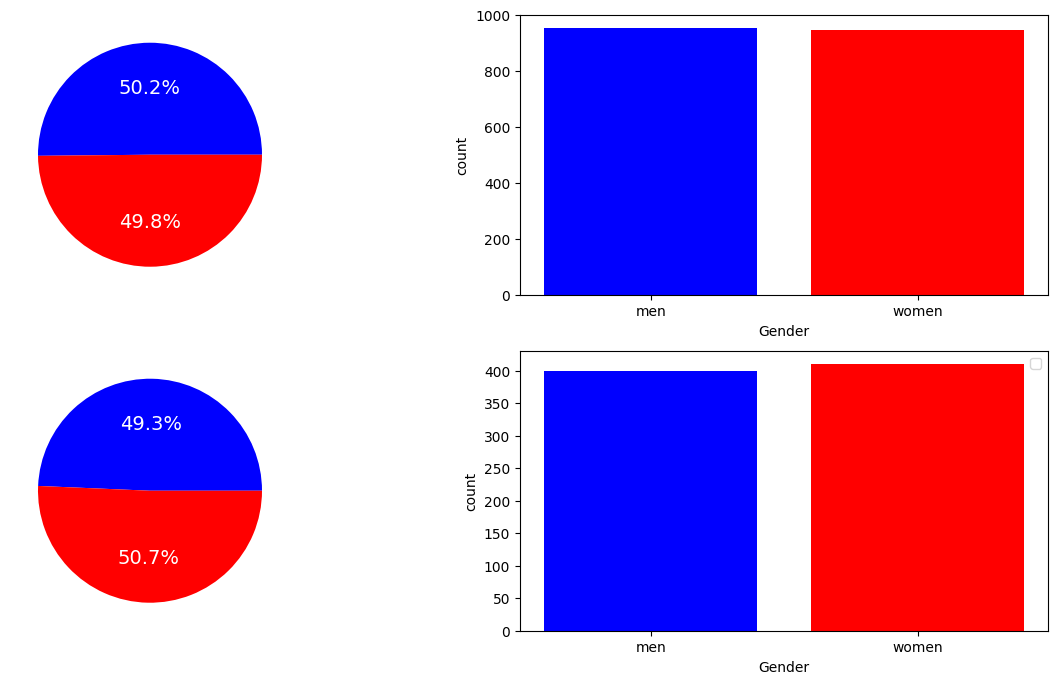

In [11]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.pie([np.unique(Y_train, return_counts=True)[1][0], np.unique(Y_train, return_counts=True)[1][1]], labels=['men', 'women'], colors = ['blue', 'red'], autopct='%1.1f%%', textprops={'fontsize': 14, 'color': 'white'})
plt.subplot(2, 2, 2)
plt.bar(['men', 'women'], [np.unique(Y_train, return_counts=True)[1][0], np.unique(Y_train, return_counts=True)[1][1]], color = ['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('count')

plt.subplot(2, 2, 3)
plt.pie([np.unique(Y_test, return_counts=True)[1][0], np.unique(Y_test, return_counts=True)[1][1]], labels=['men', 'women'], colors = ['blue', 'red'], autopct='%1.1f%%', textprops={'fontsize': 14, 'color': 'white'})
plt.subplot(2, 2, 4)
plt.bar(['men', 'women'], [np.unique(Y_test, return_counts=True)[1][0], np.unique(Y_test, return_counts=True)[1][1]], color = ['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('count')

plt.legend()
plt.show()

# **CNN Architecture**

In [12]:
model = Sequential()
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(32, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# model.add(Conv2D(512, kernel_size=(3,3), padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,276,865 (50.65 MB)

 Trainable params: 13,275,905 (50.64 MB)

 Non-trainable params: 960 (3.75 KB)

In [14]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
path = '/kaggle/working/menVSwomen.keras'

model_checkpoint = ModelCheckpoint(
    filepath=path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
)

model_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    verbose=1,
    mode='min',
    restore_best_weights=True,
    start_from_epoch=1
)

In [16]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(Y_train), y=Y_train)

# Convert the result to a dictionary
class_weights_dict = dict(enumerate(class_weights))

class_weights_dict

{0: 0.9968520461699895, 1: 1.0031678986272439}

In [17]:
# learning rate
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

# **Training the model**

In [18]:
result = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test), 
    epochs=50, 
    class_weight=class_weights_dict, 
    callbacks=[model_checkpoint, model_early_stopping, lr_reduction])
# added weight parameter because the data was imbalanced

Epoch 1/50


2024-07-18 05:56:27.717520: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 5.22285, expected 4.50617
2024-07-18 05:56:27.717576: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19: 4.83523, expected 4.11855
2024-07-18 05:56:27.717585: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 20: 6.14347, expected 5.42679
2024-07-18 05:56:27.717595: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21: 5.72417, expected 5.00749
2024-07-18 05:56:27.717602: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 6.00776, expected 5.29109
2024-07-18 05:56:27.717610: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 5.39609, expected 4.67941
2024-07-18 05:56:27.717618: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 5.14673, expected 4.43005
2024-07-18 05:56:27.717626: E external/local_xla/

 4/60 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4427 - loss: 3.4083

I0000 00:00:1721282197.777407   12913 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5375 - loss: 4.9134

2024-07-18 05:56:42.888669: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 6.76632, expected 5.83883
2024-07-18 05:56:42.888730: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 7.3848, expected 6.45731
2024-07-18 05:56:42.888740: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.91853, expected 6.99104
2024-07-18 05:56:42.888749: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 8.11379, expected 7.18631
2024-07-18 05:56:42.888757: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.75727, expected 6.82978
2024-07-18 05:56:42.888765: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.80041, expected 5.87293
2024-07-18 05:56:42.888773: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 7.51242, expected 6.58493
2024-07-18 05:56:42.888781: E external/local_xla/xla/ser

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.5373 - loss: 4.9194

2024-07-18 05:56:52.688541: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 6.79984, expected 5.93633
2024-07-18 05:56:52.688596: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.88388, expected 6.02037
2024-07-18 05:56:52.688605: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 7.1383, expected 6.2748
2024-07-18 05:56:52.688613: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19: 6.87069, expected 6.00719
2024-07-18 05:56:52.688621: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 20: 6.19625, expected 5.33275
2024-07-18 05:56:52.688629: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21: 7.51432, expected 6.65081
2024-07-18 05:56:52.688637: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 27: 7.48632, expected 6.62282
2024-07-18 05:56:52.688645: E external/local_xla/xla/


Epoch 1: val_loss improved from inf to 1.66636, saving model to /kaggle/working/menVSwomen.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 34s 287ms/step - accuracy: 0.5372 - loss: 4.9223 - val_accuracy: 0.5402 - val_loss: 1.6664 - learning_rate: 0.0010
Epoch 2/50
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5118 - loss: 3.5564
Epoch 2: val_loss did not improve from 1.66636
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5119 - loss: 3.5512 - val_accuracy: 0.4759 - val_loss: 1.7338 - learning_rate: 0.0010
Epoch 3/50
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5258 - loss: 2.6580
Epoch 3: val_loss improved from 1.66636 to 1.51370, saving model to /kaggle/working/menVSwomen.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5255 - loss: 2.6511 - val_accuracy: 0.4462 - val_loss: 1.5137 - learning_rate: 0.0010
Epoch 4/50
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5169 - loss: 1.9069
Epoch 4: val_loss improved from 1.51370 to 1.40439, saving model to /kaggle/w

# **Loss & Accuracy Graph**

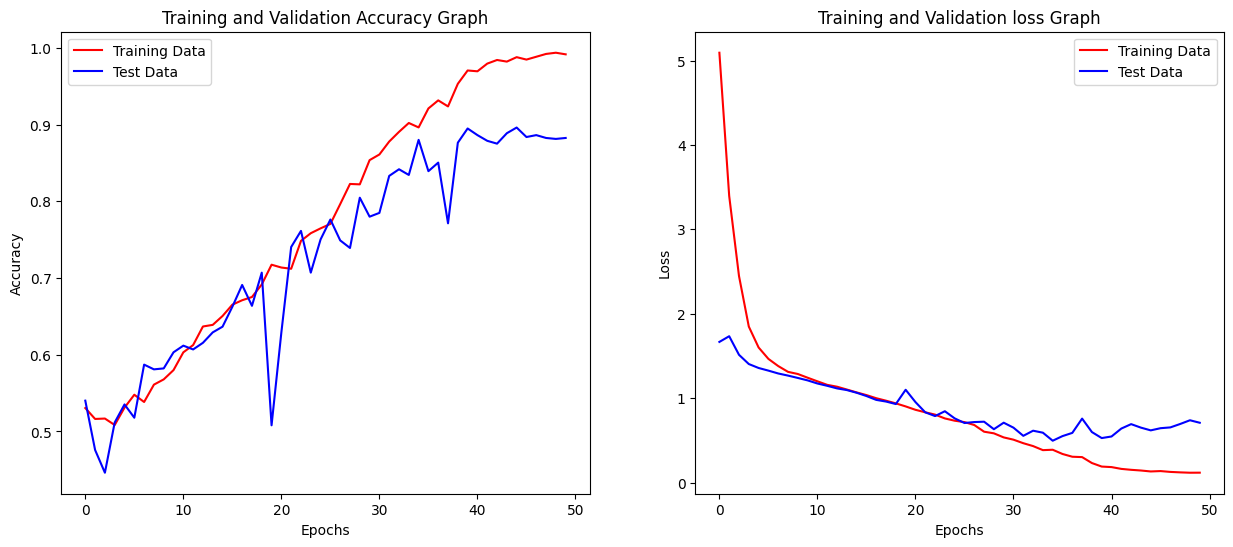

In [19]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(result.history['accuracy'], color='r', label="Training Data")
plt.plot(result.history['val_accuracy'], color='b', label="Test Data")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy Graph")

plt.subplot(1,2,2)
plt.plot(result.history['loss'], color='r', label="Training Data")
plt.plot(result.history['val_loss'], color='b', label="Test Data")
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation loss Graph")

plt.show()

# Classification Report

In [20]:
predictions = model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [21]:
# Extract predicted labels from the prediction
prediction_list = []

for pred in predictions:
    prediction_list.append(int(np.round(pred[0])))
    
prediction_list = np.array(prediction_list)

In [22]:
report = classification_report(Y_test, prediction_list)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       399
           1       0.87      0.90      0.88       410

    accuracy                           0.88       809
   macro avg       0.88      0.88      0.88       809
weighted avg       0.88      0.88      0.88       809



# **Testing model prediction**

In [23]:
def predict_gender(img) :
    resized_img = img.reshape(1, 256, 256, 3)
    result = model.predict(resized_img)
    prediction = result[0][0]
    if prediction <= 0.5 :
        print(f"The model predicts that the image is of a man with a confidence of {((1-prediction) * 100):.2f}%.\n")
    else :
        print(f"The model predicts that the image is of a woman with a confidence of {((prediction) * 100):.2f}%.\n")

    plt.axis('off')
    plt.imshow(img)

2024-07-18 05:59:58.932521: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387127: 5.77154, expected 5.03187
2024-07-18 05:59:58.932578: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387168: 6.05753, expected 5.31786
2024-07-18 05:59:58.932595: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387274: 5.79451, expected 5.05483
2024-07-18 05:59:58.932608: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387303: 6.3865, expected 5.64683
2024-07-18 05:59:58.932619: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387310: 6.3852, expected 5.64553
2024-07-18 05:59:58.932629: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387370: 6.37416, expected 5.63449
2024-07-18 05:59:58.932640: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387381: 4.72788, expected 3.98821
2024-07-18 05:59:58.93

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
The model predicts that the image is of a woman with a confidence of 100.00%.



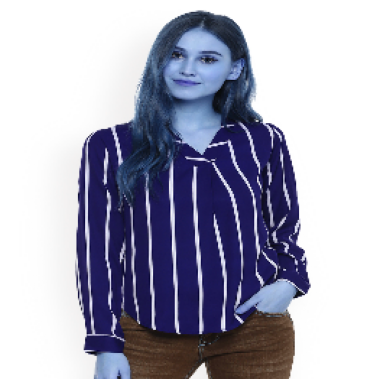

In [24]:
random_index = np.random.randint(0, len(X_test))
img = X_test[random_index]
predict_gender(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The model predicts that the image is of a man with a confidence of 94.76%.



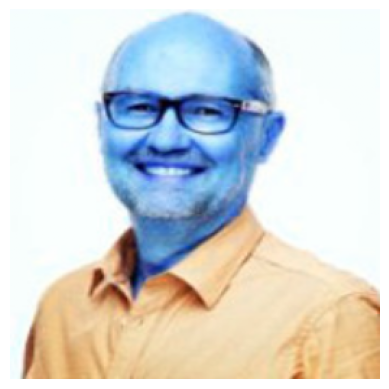

In [33]:
random_index = np.random.randint(0, len(X_test))
img = X_test[random_index]
predict_gender(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The model predicts that the image is of a woman with a confidence of 78.74%.



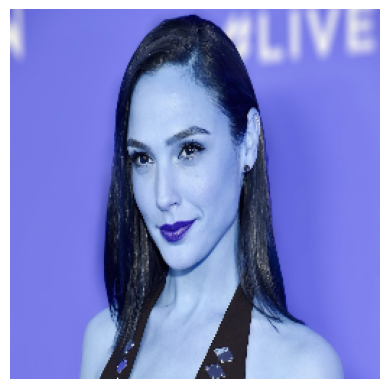

In [34]:
random_index = np.random.randint(0, len(X_test))
img = X_test[random_index]
predict_gender(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The model predicts that the image is of a man with a confidence of 99.84%.



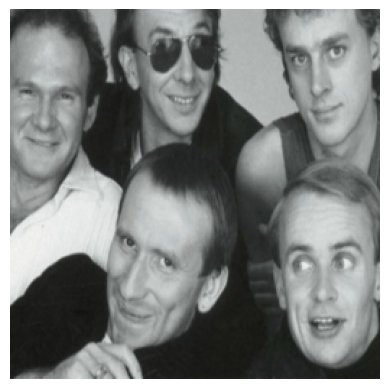

In [27]:
random_index = np.random.randint(0, len(X_test))
img = X_test[random_index]
predict_gender(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The model predicts that the image is of a man with a confidence of 100.00%.



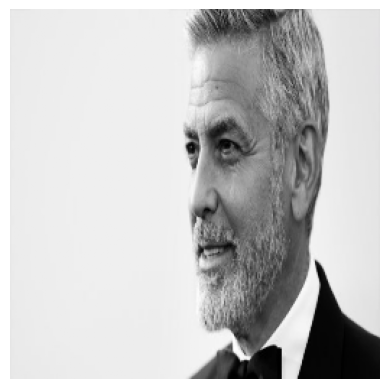

In [28]:
random_index = np.random.randint(0, len(X_test))
img = X_test[random_index]
predict_gender(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The model predicts that the image is of a woman with a confidence of 99.06%.



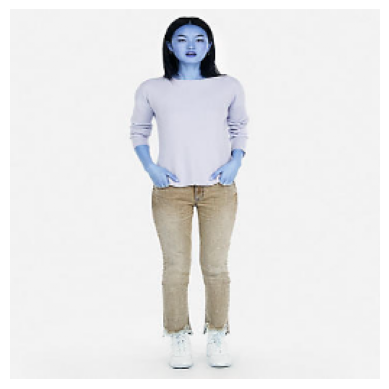

In [29]:
random_index = np.random.randint(0, len(X_test))
img = X_test[random_index]
predict_gender(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The model predicts that the image is of a man with a confidence of 85.52%.



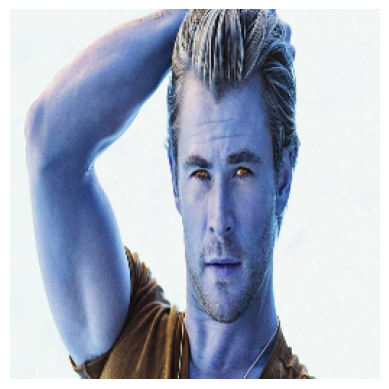

In [30]:
random_index = np.random.randint(0, len(X_test))
img = X_test[random_index]
predict_gender(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The model predicts that the image is of a woman with a confidence of 95.90%.



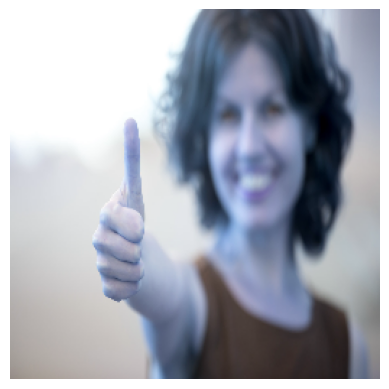

In [31]:
random_index = np.random.randint(0, len(X_test))
img = X_test[random_index]
predict_gender(img)